# Introduction to the Assignment 1

* We first need to import the astropy library and import the fits module from there in order to open the fits files on our code.
* We will also import the libraries we need for the plotting and statistical calculations.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [11]:
#We import fits module from astropy library.
from astropy.io import fits

In [12]:
#Now we load in our data.
dr3stars = fits.open("gaiadr3_cluster_stars.fits")

#To check the information about the FITS file we have.
#dr3stars.info()

#To check the Column information.
#print(dr3stars[1].columns)

In [13]:
#Now we get our stars using the Pandas library.
import pandas as pd

#Now we assign the table to the Pandas Dataframe as follows.
stars = pd.DataFrame(dr3stars[1].data)

#We strip the white spaces the data has between cluster names in the Name column
#(which are 20 characters long).
stars["Name"] = stars["Name"].str.strip()

#print(stars)

In [14]:
#Now we need to get the number of starrs associated with the given cluster
#name in the Pandas Dataframe.
#We will also obtain information on the extend of the cluster in the RA and Dec
#directions.
#Basically what we will get is:
    # 1-) Index
    # 2-) The Name of the Cluster
    # 3-) The Number of stars in the Cluster

#We define the cluster counts.
clcounts = stars.groupby(["Name"]).size().reset_index(name = "count")
print(clcounts)

                 Name  count
0            1636-283     38
1           ADS_16795     41
2     AH03_J0748+26.9     68
3            ASCC_100     87
4            ASCC_101    224
...               ...    ...
7162      vdBergh_152     25
7163       vdBergh_80     93
7164       vdBergh_83     92
7165       vdBergh_85    105
7166       vdBergh_92    345

[7167 rows x 2 columns]


# Task 1:
* The parameter **`Prob`** gives a conservative estimate of the probability that the star is associated with the cluster.
* It does this by doing a **"clustering"** analysis of the Stars in the 5-Dimensional Astrometic Parameter Space.
* So it basically does it by using:
    * **`RAdeg`**
    * **`DEdeg`**
    * **`Plx`**
    * **`pmRA`**
    * **`pmDE`**

* Use the Pandas **`sample`** function on your Cluster Star Counts Dataframe, to randomly select 4 clusters, only from clusters **with > 1000 candidate stars**.
* Split each cluster into 2 subsamples corresponding to stars with **`Prob`≤ 0.8** and with **`Prob`> 0.8** for each cluster.
* Make a Scatter Plot Matrix (see the extras episode) to show **on the same figure** the data points for both subsamples on this 5-D Parameter Space.
* Note that it is fine to make a new sample of clusters you want to plot if you wish, **but be sure to write in your notebook the names of the clusters you plotted and commented on.**

* **In your brief comment on your results, explain:**
    * What is the likely reason for the differences between the distributions of points shown by each subsample?

In [25]:
#We first sample 4 clusters from the stars Dataframe we have defined.
    # 1-) Since we want 4 clusters we take n = 4.
    # 2-) Since we want clusters that have more candidate stars than 1000, we 7
    #take weights as clcounts["count"] > 1000.

def cluster_sample(clcounts):
    """Takes the cluster numbers and returns 4 randomly selected clusters that
    have over 1000 candidate stars.
    
    Input:
    ----------------------------------------------------------------------------
    clcounts: Cluster DataFrame
    
    Output:
    ----------------------------------------------------------------------------
    clusters: Cluster DataFrame with 4 randomly selected clusters with over 1000
    candidate stars.
    
    """
    
    clusters = clcounts.sample(n = 4, weights = clcounts["count"] > 1000)
    
    return clusters

cluster_samples = cluster_sample(clcounts)
print(cluster_samples)
#print(cluster_samples.iloc[0,0]) to get the name
#print(cluster_samples.iloc[1,0]) to get the name
#print(cluster_samples.iloc[0,1]) to get the count

               Name  count
4479       NGC_1912   1072
4815       NGC_6838   3616
1315  Collinder_110   1523
5260   Ruprecht_171   1086


In [26]:
#Now we need to use the "Prob" i.e. the probabilities to separate our clusters
#into 2 subsamples.
#For we define the following in order to get the all the stars inside a cluster.
def cl_stars(cl_name, cl_samples, stars):
    """Takes the cluster name, clusters dataframe and the star dataframe, 
    returns all the stars that are inside the given cluster name.
    
    Input:
    ----------------------------------------------------------------------------
    cl_name: Name of the Cluster
    cl_samples: Cluster DataFrame
    stars: Star DataFrame
    
    Output:
    ----------------------------------------------------------------------------
    data_frame: DataFrame with all the stars in the given Cluster name.
    
    """
    
    #We take the clusters name.
    cluster_name = cl_name
    
    #We find the rows that have the cluster's name in the stars dataframe.
    rows = stars[stars["Name"] == cluster_name]
    
    #We merge both Data Frames based on the "Name" column as follows.
    data_frame = pd.merge(rows, cl_samples, on = "Name", how = "inner")
    
    return data_frame

#Let's see if the function works.
cl_stars_result = cl_stars(cluster_samples.iloc[0,0], cluster_samples, stars)
cl_stars(cluster_samples.iloc[0,0], cluster_samples, stars)

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS,count
0,NGC_1912,4500,183351569752465920,1,1.000000,82.132123,0.024357,35.868321,0.019329,172.217374,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
1,NGC_1912,4500,183351608405966336,0,0.355193,82.098901,0.076812,35.870194,0.054694,172.200893,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
2,NGC_1912,4500,183351604110464512,1,0.880849,82.098506,0.014478,35.869696,0.011374,172.201130,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
3,NGC_1912,4500,183351574050609536,1,1.000000,82.127724,0.016820,35.866530,0.012427,172.216889,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
4,NGC_1912,4500,183351608410353024,1,1.000000,82.106812,0.015939,35.873313,0.012470,172.201850,...,11.444468,0.017798,3.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NGC_1912,4500,183323497845937664,0,0.373367,82.155734,0.277930,35.723937,0.217747,172.348192,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
1068,NGC_1912,4500,183323433424927488,0,0.363417,82.192162,0.035333,35.734635,0.027349,172.355661,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
1069,NGC_1912,4500,183323463486258304,1,0.531923,82.204335,0.228622,35.746485,0.168716,172.351262,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072
1070,NGC_1912,4500,183323463486239360,1,0.681846,82.204175,0.070285,35.739848,0.054529,172.356717,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1072


In [27]:
#Now we define a function to create subsamples that correspond to Stars with
#Prob ≤ 0.8 and Stars with Prob > 0.8.

def cl_subsamples(cl_stars):
    """Takes the star list, depending on the stars' probabilities returns two
    subsets/subsamples as follows: Stars with Prob ≤ 0.8 and Stars with 
    Prob > 0.8.
    
    Input:
    ----------------------------------------------------------------------------
    cl_stars: DataFrame with all the stars in a given Cluster name.
    
    Output:
    ----------------------------------------------------------------------------
    prob_larger: DataFrame with all the stars that have a probability higher
    than 0.8.
    prob_smaller: DataFrame with all the stars that have a probability smaller
    or equal to 0.8.
    
    """
    
    #We define the condition we have.
    split_condition = (cl_stars["Prob"] <= 0.8)
    
    #Now we create the subsamples.
    prob_smaller = cl_stars[split_condition]
    prob_larger = cl_stars[~split_condition] 
    
    #Note that "~" stands for "NOT" so it takes all the stars that have a
    #probability that are not smaller or equal to 0.8.
    
    return prob_larger, prob_smaller

In [28]:
#Now we have to create a scatter plot for each cluster and their subsamples.
#We will define a function for whole plotting process.

#We also import Patch from matplotlib to use it in legend.
from matplotlib.patches import Patch

def scatter_plot(cl_subsamp1, cl_subsamp2):
    """Takes two subsample DataFrame of stars inside one cluster, 
    returns the Scatter plots of the the subsamples in 5-D Parameter Space.
    
    Input:
    ----------------------------------------------------------------------------
    cl_subsamp1: DataFrame of subsample of high probability stars inside a 
    cluster.
    cl_subsamp2: DataFrame of subsample of low probability stars inside a 
    cluster.
    
    Output:
    ----------------------------------------------------------------------------
    5-D Scatter Plot of both subsamples.
    
    """
    #For this we first define the labels we have, which are the parameters we use
    #for clustering of the stars.
    labels = ["RAdeg", "DEdeg", "Plx", "pmRA", "pmDE"]

    #Now we horizontally stack all the columns we need by using np.column_stack!
    #We do this for both of the subsamples!
    h_array_1 = np.column_stack((cl_subsamp1["RAdeg"], cl_subsamp1["DEdeg"],
                                cl_subsamp1["Plx"], cl_subsamp1["pmRA"],
                                cl_subsamp1["pmDE"]))
    
    h_array_2 = np.column_stack((cl_subsamp2["RAdeg"], cl_subsamp2["DEdeg"],
                                cl_subsamp2["Plx"], cl_subsamp2["pmRA"],
                                cl_subsamp2["pmDE"]))
    
    #Since we will do a 5-D Scatter plot, our dimensions are defined as 5.
    num_dim = 5
    
    #Now we define the figures and the axes as follows.
    figure, axes = plt.subplots(num_dim, num_dim, figsize = (10, 10))
    
    #Now we adjust the figures so that the spacings are as we want.
    figure.subplots_adjust(wspace = 0.3, hspace = 0.35)
    
    #We add a label to our figure.
    figure.suptitle(f"Cluster Name: {cl_subsamp1['Name'].iloc[0]}", size = 20)
    
    #Now we do the following to get our plot grid.
    #Note that yellow is for high probability and black is for low probability.
    for i in range(num_dim): #y dimension of the grid.
        for j in range(num_dim): #x dimension of the grid
            if i == j: #For (0,0), (1,1), (2,2) etc.
                axes[i, j].hist(h_array_2[ : , i], bins = 20, color = "black")
                axes[i, j].hist(h_array_1[ : , i], bins = 20, color = "yellow")
                
        
            elif i > j: #For (0,1), (0,2), ... ,(1,2), ...
                axes[i, j].scatter(h_array_2[ : , j], h_array_2[ : , i], s = 3, c = "black")
                axes[i, j].scatter(h_array_1[ : , j], h_array_1[ : , i], s = 3, c = "yellow")
        
            else:
                axes[i, j].axis("off")
        
            if j == 0: #For (0,1), (0,2) ...
                if i == j:
                    axes[i, j].set_ylabel("counts", fontsize = 12)
            
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize = 12)
        
            if i == (num_dim - 1):
                axes[i, j].set_xlabel(labels[j], fontsize = 12)
    
    #To prevent plots clipping through one another we do the following.
    plt.tight_layout()
    
    #We also add a legend.
    color_patches = [Patch(color = "black"), Patch(color = "yellow")]
    label_list = ["Low Probability Stars", "High Probability Stars"]
    figure.legend(handles = color_patches, labels = label_list, loc = "upper right", bbox_to_anchor=(0.9, 0.8))
    
    #We show our plot.
    plt.show()

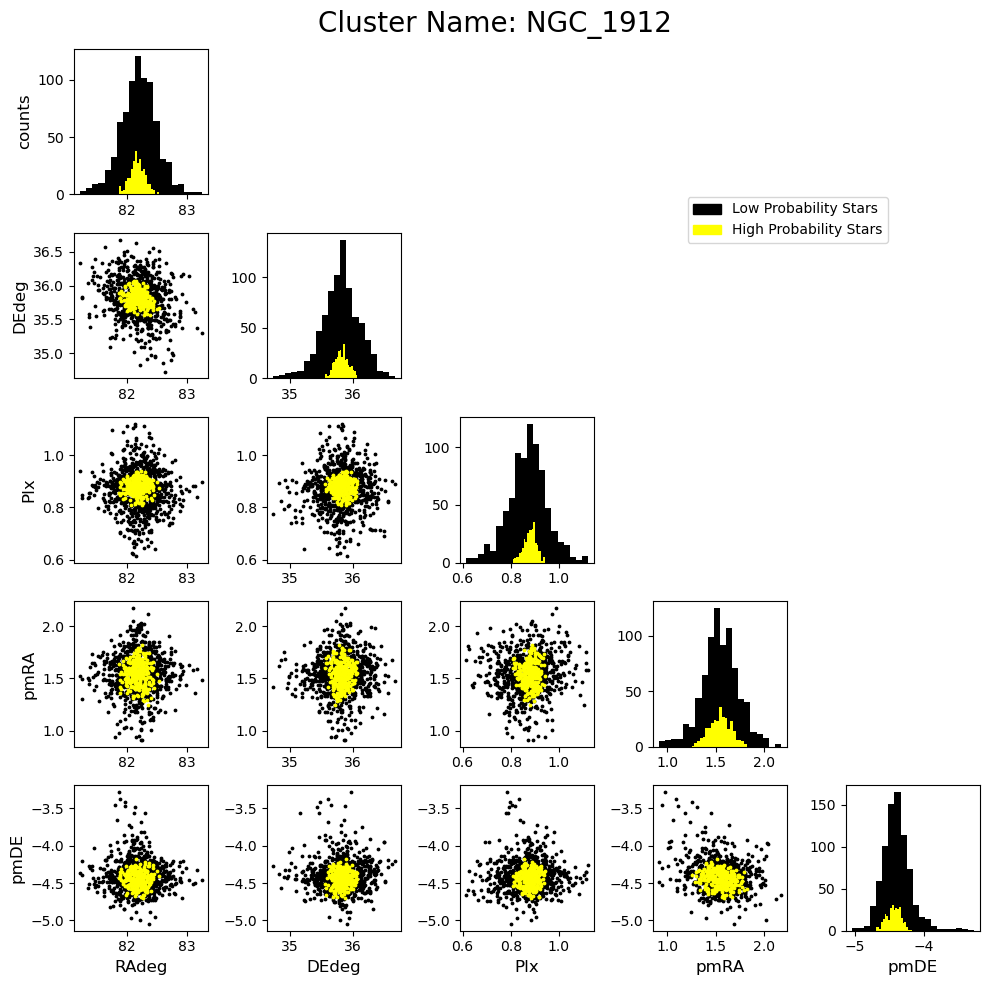

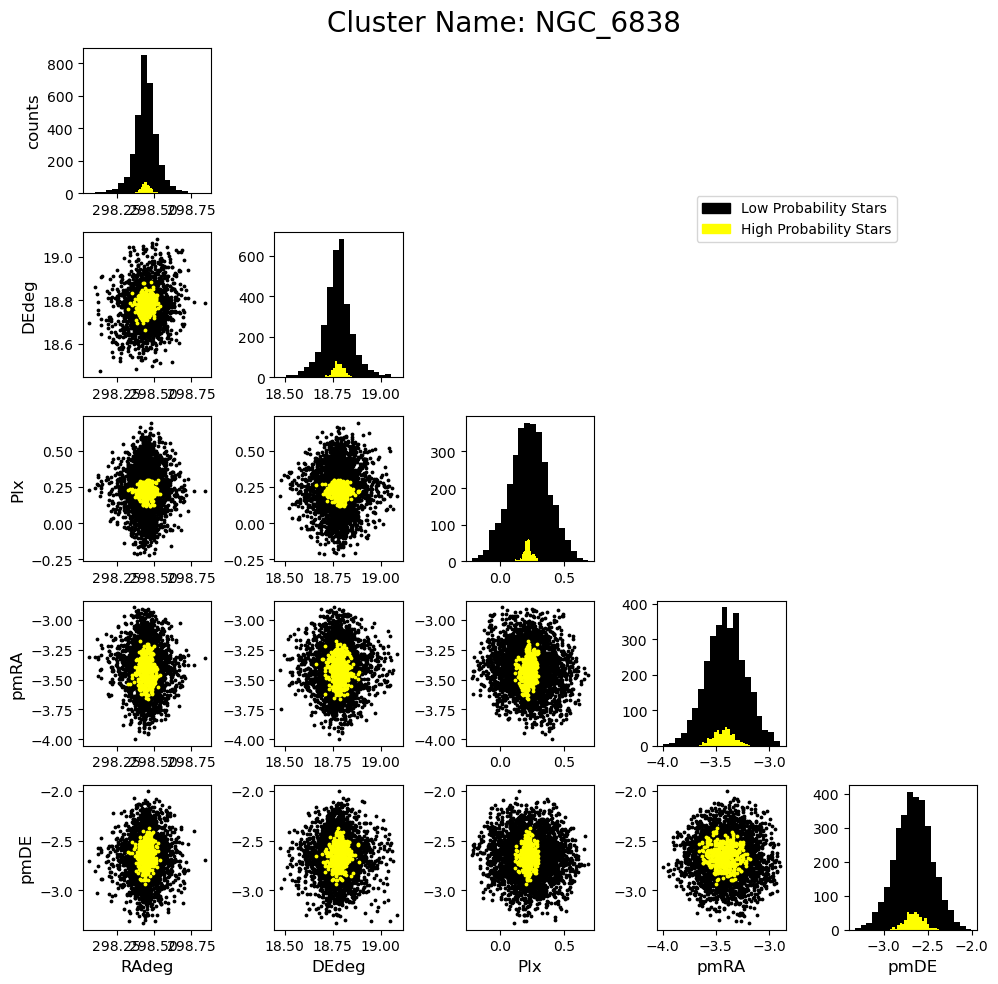

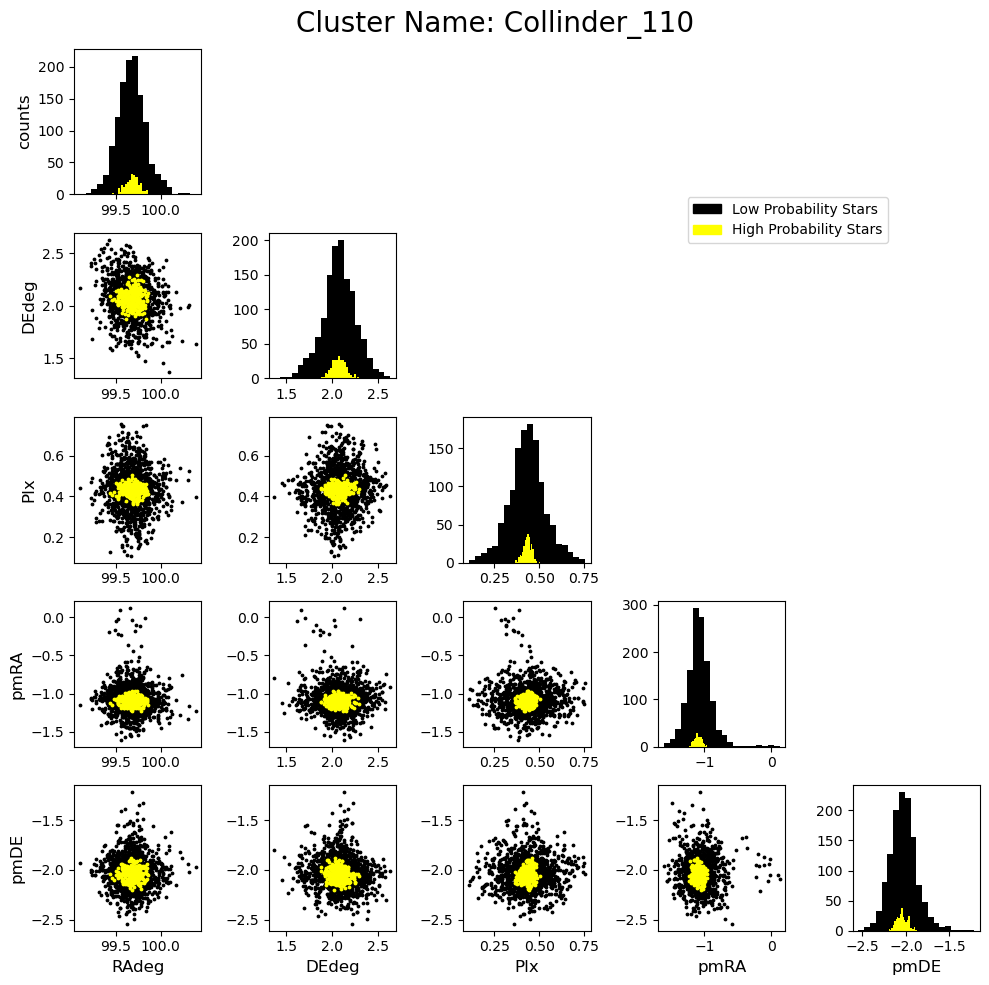

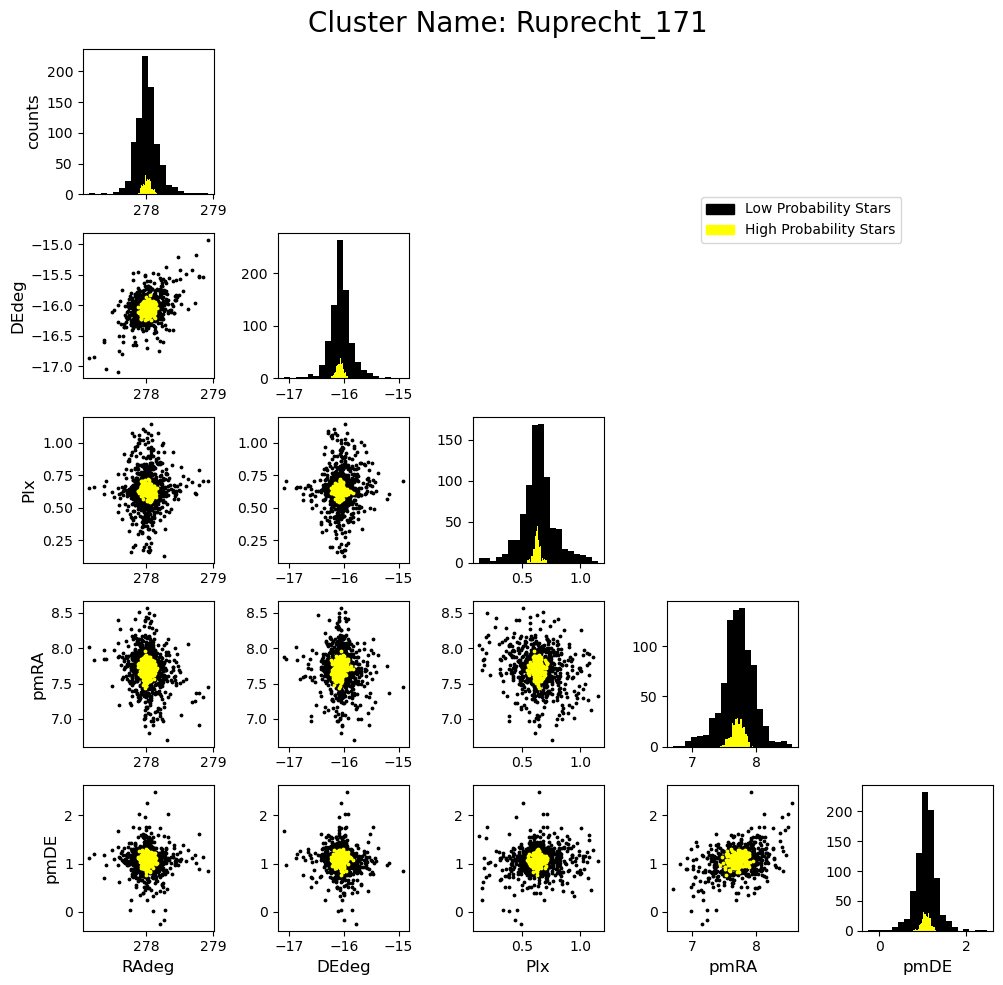

In [29]:
#Now we plot every Cluster we have as follows.
for i in range(0,4):
    #We get the Stars inside one of our clusters.
    cl_result = cl_stars(cluster_samples.iloc[i,0], cluster_samples, stars)
    
    #We now get the subsamples of probabilities.
    prob_larger, prob_smaller = cl_subsamples(cl_result)
    
    #We now plot the cluster stars.
    scatter_plot(prob_larger, prob_smaller)

### Comment on the Results:
* The reason why there are differences between High Probability and Low Probability stars is because of their distribution across the parameters we are looking at.
* Since in the cluster the stars are considered in the same distance and (more or less) same coordinates we see that the high probability star distributions are more compact/thin.
* As for the low probability stars, their parameters are, as expected, distributed a lot more wider.

# Task 2:
* For the remaining analysis in this assignment, we will only limit ourselves to: 
    * 1-) Stars with **`Prob`> 0.8**
    * 2-) Stars that are more tightly clustered together.
        * We do this to **rule out looser associations which will have a wide spacial variance in their parameters due to the range of distances from us.**

* To select such clusters, we can use the following lines of code to:
    * 1-) **Create a new stars DataFrame containing only the higher-probability stars.**
    * 2-) **Create a new clusters DataFrame with the star counts and Standard Deviations in RA and Dec for each cluster.**

In [30]:
#We get the stars that have high probability from the stars DataFrame as 
#follows.
stars_hiprob = stars[stars.Prob > 0.8]

#We define a new clusters DataFrame with High Probability stars only.
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')

#We also define add the newly defined clusters DataFrame the stars' Standard 
#Deviations in RA (Right Ascension) and Dec (Declination).
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

print(clusters_hiprob)

                 Name  count  sd_RAdeg  sd_DEdeg
0            1636-283     30  0.038488  0.032713
1           ADS_16795     41  5.028249  2.071391
2     AH03_J0748+26.9     28  0.029759  0.034522
3            ASCC_100     87  0.848365  0.904561
4            ASCC_101    149  0.519560  0.886064
...               ...    ...       ...       ...
7162      vdBergh_152     25  0.863601  0.201857
7163       vdBergh_80     93  0.336260  0.260737
7164       vdBergh_83     92  0.283638  0.200000
7165       vdBergh_85    105  0.107164  0.077127
7166       vdBergh_92    166  0.078782  0.090297

[7167 rows x 4 columns]


* Now use the new **`clusters_hiprob`** DataFrame to make a new cluster sample containing only: 
    * 1-) Clusters with > 200 Stars 
    * 2-) Standard Deviations of RA and Dec < 0.1° (To constrain the cluster size)

* **We will work with these clusters and Prob > 0.8 stars for the remainder of this assignment!**

In [31]:
#We now make a new cluster sample with clusters that have over 200 stars and
#standard deviations of RA and Dec smaller than 0.1 degrees.
#Note that "df" stands for dataframe
clusters_df = clusters_hiprob[(clusters_hiprob["count"] > 200) & 
                              (clusters_hiprob["sd_RAdeg"] < 0.1) &
                              (clusters_hiprob["sd_DEdeg"] < 0.1)]

#We print our new Cluster DataFrame.
print(clusters_df)

#Note that we will use the High Probability stars from now on.
#print(stars_hiprob)

               Name  count  sd_RAdeg  sd_DEdeg
217     Berkeley_36    217  0.040135  0.048875
219     Berkeley_39    211  0.029860  0.034516
221     Berkeley_43    205  0.053164  0.051358
1315  Collinder_110    275  0.079560  0.076032
1381     Czernik_41    205  0.062116  0.059241
...             ...    ...       ...       ...
6059    Trumpler_25    245  0.045522  0.038393
6070     Trumpler_5    605  0.059707  0.056944
6091       UBC_1020    210  0.079440  0.083825
6124        UBC_106    245  0.060764  0.058970
6926         UFMG_2    212  0.062009  0.038961

[85 rows x 4 columns]


* An interesting question is whether there is **any Spatial (RA and Dec) variation of the other Astrometric and Photometric Parameters in each cluster now**:

## a-)
* Select a cluster from your sample. (Your choice but you can randomly select from the clusters if you wish.)
* Split it into 2 subsamples in RA, corresponding to stars with RA:
    * 1-) Greater than the mean RA.
    * 2-) Less than the mean RA.

* Do the same process for Dec to create 2 subsamples selected on Dec:
    * 1-) Greater than the mean Dec.
    * 2-) Less than the mean Dec.

* Then for the RA-Selected subsamples:
    * Plot a figure with 5 separate subplots (e.g. side-by-side) which show the histograms of the following parameters for each of the 2 subsamples:
        * 1-) `Plx`
        * 2-) `pmRA`
        * 3-) `pmDE`
        * 4-) `Gmag`
        * 5-) `BP-RP`

* In other words:
    * Each subplot will show two histograms, one for each subsample.
    * That way we can compare the distributions for stars on one side of the cluster vs. the other.

* Repeat the same process for the 2 subsamples selected on Dec.

In [221]:
#We first need to create a function that creates the subsamples we need for RA
#and Dec.

def RA_Dec_Subsamples(clusters_df, stars_hiprob):
    """Takes the DataFrame of clusters and returns two subsamples for both RA
    (Right Ascension) and Dec (Declination) values depending on the total 
    average of the RA and Dec values.
    
    Input:
    ----------------------------------------------------------------------------
    clusters_df: Cluster DataFrame.
    stars_hiprob: DataFrame that contains Stars that are over 0.8 probability.
    
    Output:
    ----------------------------------------------------------------------------
    RA_smaller: Stars that have RA values that are smaller than the mean RA. 
    RA_larger: Stars that have RA values that are larger than the mean RA.
    Dec_smaller: Stars that have Dec values that are smaller than the mean Dec.
    Dec_larger: Stars that have Dec values that are larger than the mean Dec.
    
    """
    
    #We first select a random cluster from our cluster DataFrame.
    cluster = clusters_df.sample(n = 1)
    
    #Now we need to get the stars inside the cluster we have selected.
    #For this we can use our previously defined function.
    stars = cl_stars(cluster.iloc[0,0], clusters_df, stars_hiprob)
    
    #Now that we have the stars, we can take the averages of both RA and Dec.
    avg_RA = stars["RAdeg"].mean()
    avg_Dec = stars["DEdeg"].mean()
    
    #Finally, we can create our subsets for RA and Dec as follows.
    split_condition_RA = (stars["RAdeg"] <= avg_RA)
    split_condition_Dec = (stars["DEdeg"] <= avg_Dec)
    
    #Now we create the subsamples by using our split conditions.
    RA_smaller = stars[split_condition_RA]
    RA_larger = stars[~split_condition_RA] 
    
    Dec_smaller = stars[split_condition_Dec]
    Dec_larger = stars[~split_condition_Dec]
    
    return RA_smaller, RA_larger, Dec_smaller, Dec_larger

RA_smaller, RA_larger, Dec_smaller, Dec_larger = RA_Dec_Subsamples(clusters_df, stars_hiprob)

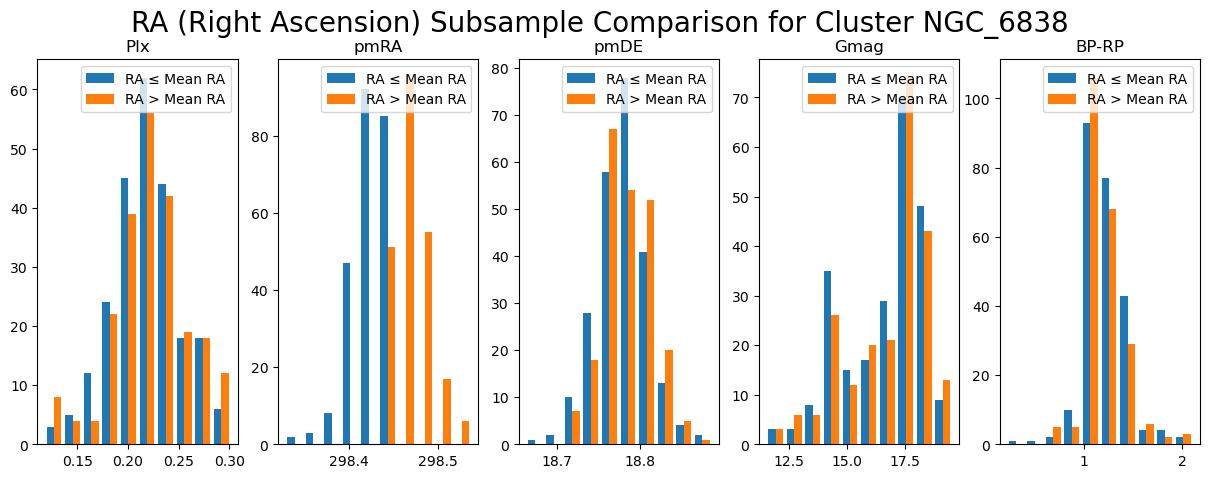

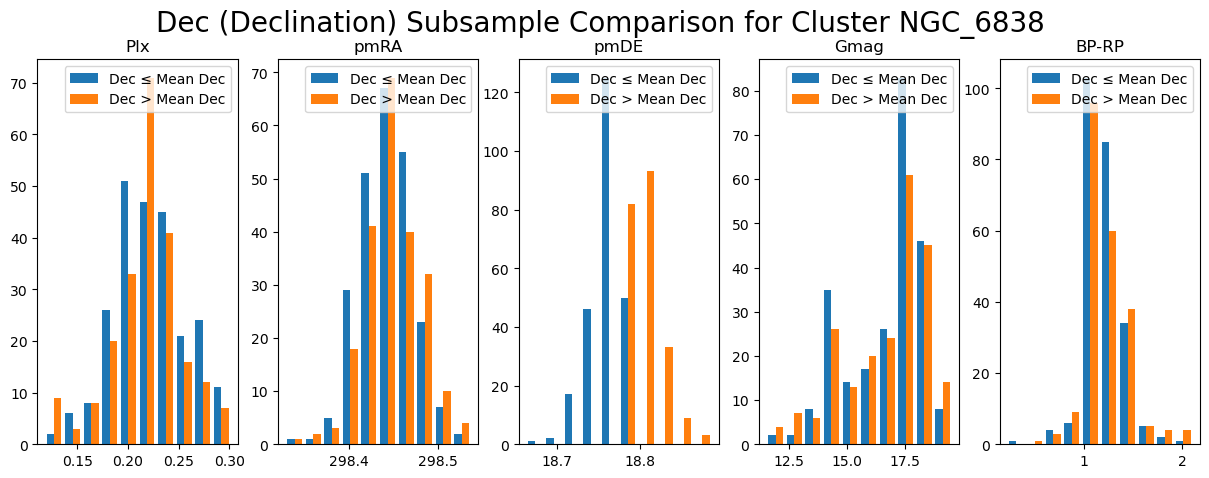

In [222]:
#Now we need to plot the RA and Dec subsamples as follows.
def plot_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger):
    """Takes the DataFrame of subsamples of stars that are separated by the
    condition of their mean RA and mean Dec. Returns the plots comparing both
    subsamples for both RA and Dec.
    
    Input:
    ----------------------------------------------------------------------------
    RA_smaller: Stars that have RA values that are smaller than the mean RA. 
    RA_larger: Stars that have RA values that are larger than the mean RA.
    Dec_smaller: Stars that have Dec values that are smaller than the mean Dec.
    Dec_larger: Stars that have Dec values that are larger than the mean Dec.
    
    Output:
    ----------------------------------------------------------------------------
    5 Subplots comparing RA Subsamples' Plx, pmRA, pmDE, Gmag and BP-RP.
    5 Subplots comparing Dec Subsamples' Plx, pmRA, pmDE, Gmag and BP-RP.
    
    """
    
    #For this we first define the labels we have, which are the parameters we use
    #for clustering of the stars.
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]

    #Now we horizontally stack all the columns we need by using np.column_stack!
    #We do this for all of the subsamples!
    
    #For the subsamples of RA.
    h_array_ra_1 = np.column_stack((RA_smaller["Plx"], RA_smaller["RAdeg"], 
                                    RA_smaller["DEdeg"], RA_smaller["Gmag"],
                                    RA_smaller["BP-RP"]))
    
    h_array_ra_2 = np.column_stack((RA_larger["Plx"], RA_larger["RAdeg"], 
                                    RA_larger["DEdeg"], RA_larger["Gmag"],
                                    RA_larger["BP-RP"]))
    
    #For the subsamples of Dec.
    h_array_dec_1 = np.column_stack((Dec_smaller["Plx"], Dec_smaller["RAdeg"], 
                                    Dec_smaller["DEdeg"], Dec_smaller["Gmag"],
                                    Dec_smaller["BP-RP"]))
    
    h_array_dec_2 = np.column_stack((Dec_larger["Plx"], Dec_larger["RAdeg"], 
                                    Dec_larger["DEdeg"], Dec_larger["Gmag"],
                                    Dec_larger["BP-RP"]))
    
    #We first create our figures.
    figure1, axes1 = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))
    figure2, axes2 = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))
    
    #We also label our figures as follows.
    figure1.suptitle(f"RA (Right Ascension) Subsample Comparison for Cluster {RA_smaller['Name'].iloc[0]}", size = 20)
    figure2.suptitle(f"Dec (Declination) Subsample Comparison for Cluster {RA_smaller['Name'].iloc[0]}", size = 20)
    
    #Now we create our histograms as follows.
    
    #For RA we do the following.
    for i in range(len(labels)):
        axes1[i].hist([h_array_ra_1[:, i], h_array_ra_2[:, i]], bins = 10, label = ['RA ≤ Mean RA', 'RA > Mean RA'])
        axes1[i].set_title(labels[i])
        axes1[i].legend()
        
    #For Dec we do the following.
    for i in range(len(labels)):
        axes2[i].hist([h_array_dec_1[:, i], h_array_dec_2[:, i]], bins = 10, label = ['Dec ≤ Mean Dec', 'Dec > Mean Dec'])
        axes2[i].set_title(labels[i])
        axes2[i].legend()
    
plot_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

## b-)
* Use t-tests to compare the 2 subsamples in RA and 2 subsamples in Dec for the following parameters:
    * 1-) `Plx`
    * 2-) `pmRA`
    * 3-) `pmDE`
    * 4-) `Gmag`
    * 5-) `BP-RP`

* For the t-test you can **assume populations with the same variance**.
* In other words:
    * We will do 5 t-tests for the subsamples selected on RA and 5 t-tests for the subsamples selected on Dec.
    * We do this to see **if there is any evidence that the populations of stars which each subsample is drawn from is different from the other subsample.**
    * We want to see **if it changes with the position in the cluster!**

In [223]:
#Assumptions: 
    #1-) Populations have the same variance.
    #2-) Sample Mean is normally distributed.

def t_test_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger):
    """Takes the DataFrame of subsamples of stars that are separated by the
    condition of their mean RA and mean Dec. Does the t-test and returns the
    t-statistic and probability values (p-values).
    
    Input:
    ----------------------------------------------------------------------------
    RA_smaller: Stars that have RA values that are smaller than the mean RA. 
    RA_larger: Stars that have RA values that are larger than the mean RA.
    Dec_smaller: Stars that have Dec values that are smaller than the mean Dec.
    Dec_larger: Stars that have Dec values that are larger than the mean Dec.
    
    Output:
    ----------------------------------------------------------------------------
    t_stats_ra: A list containing the t-stats for Right Ascension Subsamples
    p_values_ra: A list containing the p-values for Right Ascencsion Subsamples
    t_stats_dec: A list containing the t-stats for Declination Subsamples
    p_values_dec: A list containing the p-values for Declination Subsamples
    
    Note:
    ----------------------------------------------------------------------------
    The function also prints out all the results we get for the Parameter set
    we have as an extra.
    
    Definitions:
    ----------------------------------------------------------------------------
    t-stat (t-statistic): Represents the difference between the means of two
    subsamples normalized by the standard error.
    
    p-value (probability-value): Represents the probability of observing the
    t-stat as the one we have calculated, assuming that there are no significant
    differences between the means of two subsamples.
    
    """
    
    #We first define the Parameters we will compare.
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]
    
    #Now we do the t-test as follows. (sps is short for scipy.stats)
    #Note that we write equal_var = True since it is our assumption.
    
    ###########################################################################
    #For RA values:
    
    #We define lists to keep the values in lists.
    t_stats_ra, p_values_ra = [], []
    
    #We print out the results alongside our t-test.
    print(50 * "*")
    print("t-tests for the RA (Right Ascension) Subsamples: ")
    print(50 * "~")
    
    #We do the t-tests
    for parameter in labels:
        t_stat_ra, p_value_ra = sps.ttest_ind(RA_smaller[parameter], RA_larger[parameter], equal_var = True)
        t_stat_ra, p_value_ra = round(t_stat_ra, 4), round(p_value_ra, 4)
        
        t_stats_ra.append(t_stat_ra)
        p_values_ra.append(p_value_ra)
        
        print("For", parameter, ":")
        print("t-statistic: ", t_stat_ra)
        print("p-value: ", p_value_ra)
        print(50*"-")
    
    ###########################################################################
    #For Dec values:
    
    #We define lists to keep the values in lists.
    t_stats_dec, p_values_dec = [], []
    
    #We print out the results alongside our t-test.
    print("\n")
    print(50 * "*")
    print("t-tests for the Dec (Declination) Subsamples")
    print(50 * "~")
    
    #We do the t-tests
    for parameter in labels:
        t_stat_dec, p_value_dec = sps.ttest_ind(Dec_smaller[parameter], Dec_larger[parameter], equal_var = True)
        t_stat_dec, p_value_dec = round(t_stat_dec, 4), round(p_value_dec, 4)
        
        t_stats_dec.append(t_stat_dec)
        p_values_dec.append(p_value_dec)
        
        print("For", parameter, ":")
        print("t-statistic: ", t_stat_dec)
        print("p-value: ", p_value_dec)
        print(50*"-")
    
    ###########################################################################
    
    return t_stats_ra, p_values_ra, t_stats_dec, p_values_dec

t_stats_ra, p_values_ra, t_stats_dec, p_values_dec = t_test_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

**************************************************
t-tests for the RA (Right Ascension) Subsamples: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  -0.8238
p-value:  0.4105
--------------------------------------------------
For pmRA :
t-statistic:  -0.226
p-value:  0.8213
--------------------------------------------------
For pmDE :
t-statistic:  -2.5791
p-value:  0.0102
--------------------------------------------------
For Gmag :
t-statistic:  -0.4868
p-value:  0.6266
--------------------------------------------------
For BP-RP :
t-statistic:  1.0712
p-value:  0.2846
--------------------------------------------------


**************************************************
t-tests for the Dec (Declination) Subsamples
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  1.6695
p-value:  0.0957
--------------------------------------------------
For pmRA :
t-statistic:  0.8216
p-value:  0.4118
------------------------------------------------

## c-)
* Comment on the implications of your test results.
* Repeat the same procedure for two other clusters.
* Based on the parameter distributions, is the t-test an appropriate test in all cases?

### Comments on the results:
* First let's explain what the results tell us:
    * 1-) **t-statistic:**
        * If it is a large value, that means that there is a large difference between two subsamples we have. 
        * Note that "+" and "-" signs only represent the direction of difference, depending on which group has higher mean.
    * 2-) **p-value:** 
        * An estimate of the statistical significance of our hypothesis test.
        * Represents if the test statistic is equal to or more extreme than the one observed.
        * If the p-value is smaller than our Significance Level ($\alpha$) then we reject the Null Hypothesis.
    * 3-) **Significance Level:**
        * Defined as ($\alpha$).
        * We consider 1 as %100 confidence level on our results/null hypothesis.
        * So 1 - $\alpha$ would give us how credible/trustable our results are.
        * That's why if our p-value is smaller than our significance level ($\alpha$), we reject the Null Hypothesis.
    * 4-) **Null Hypothesis:**
        * We start with a Hypothesis and we want to test the data to see how credible this Hypothesis is about our data set.
        * To test this out we use the t-test or the z-test depending on the amount of data we have.
        * For our situation, our Null Hypothesis is: The Parameters we have do not change depending on the subsamples/positions we have obtained.

* Now we can interpret our results.
* We assume that our Significance Level is **0.05** so if the p-value is below this, it means that there is a big difference between two subsamples when it comes to that parameter.

* 1-) **RA Subsamples:**
    * a-) **`Plx`:** Our **p-value is 0.4105** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the Plx (Mean Parallax) values **do not change much with the position/RA subsamples.**
    * b-) **`pmRA`:** Our **p-value is 0.8213** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the pmRA (Mean Proper Motion in Right Ascension) values **do not change much with the position/RA subsamples.**
    * c-) **`pmDE`:** Our **p-value is 0.0102** which is smaller than our Significance Level 0.05. This proves that with 95% confidence level the pmDE (Mean Proper Motion in Declination) values **do change with the position/RA subsamples significantly.**
    * d-) **`Gmag`:** Our **p-value is 0.6266** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the Gmag (Mean G-Band Magnitude) values **do not change much with the position/RA subsamples.**
    * e-) **`BP-RP`:** Our **p-value is 0.2846** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the BP-RP (BP-RP Colour) values **do not change much with the position/RA subsamples.**

* 2-) **Dec Subsamples:**
    * a-) **`Plx`:** Our **p-value is 0.0957** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the Plx (Mean Parallax) values **do not change much with the position/Dec subsamples.**
    * b-) **`pmRA`:** Our **p-value is 0.4118** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the pmRA (Mean Proper Motion in Right Ascension) values **do not change much with the position/Dec subsamples.**
    * c-) **`pmDE`:** Our **p-value is 0.0371** which is smaller than our Significance Level 0.05. This proves that with 95% confidence level the pmDE (Mean Proper Motion in Declination) values **do change with the position/Dec subsamples significantly.**
    * d-) **`Gmag`:** Our **p-value is 0.8717** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the Gmag (Mean G-Band Magnitude) values **do not change much with the position/Dec subsamples.**
    * e-) **`BP-RP`:** Our **p-value is 0.2759** which is larger than our Significance Level 0.05. This proves that with 95% confidence level the BP-RP (BP-RP Colour) values **do not change much with the position/Dec subsamples.**

* **Now we do t-tests for 2 other clusters as follows.**

**************************************************
t-tests for the RA (Right Ascension) Subsamples: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  -0.8119
p-value:  0.4172
--------------------------------------------------
For pmRA :
t-statistic:  0.1868
p-value:  0.8518
--------------------------------------------------
For pmDE :
t-statistic:  1.8753
p-value:  0.0612
--------------------------------------------------
For Gmag :
t-statistic:  -0.0137
p-value:  0.9891
--------------------------------------------------
For BP-RP :
t-statistic:  4.4315
p-value:  0.0
--------------------------------------------------


**************************************************
t-tests for the Dec (Declination) Subsamples
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  0.8026
p-value:  0.4225
--------------------------------------------------
For pmRA :
t-statistic:  1.4393
p-value:  0.1506
--------------------------------------------------
F

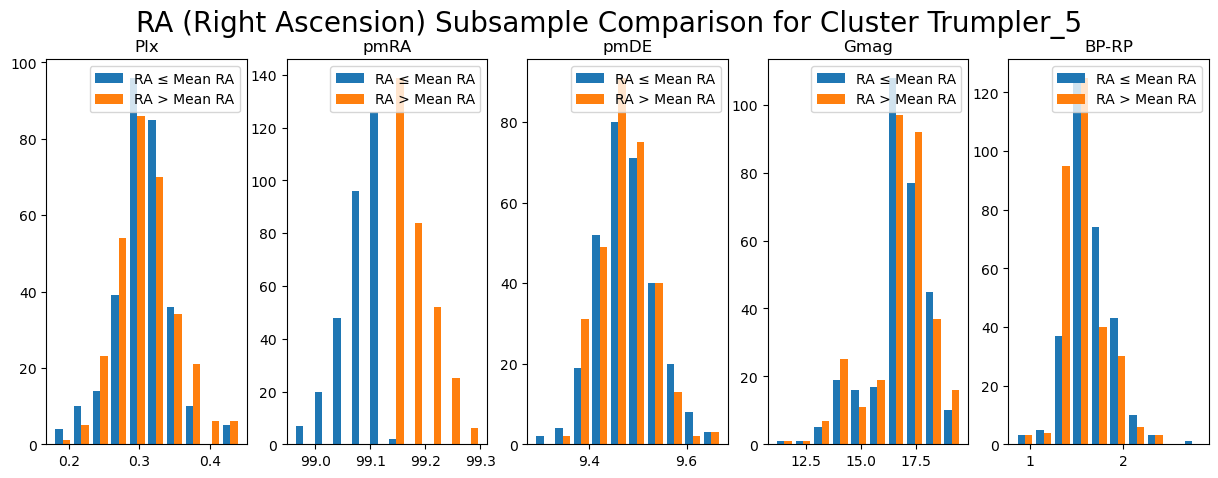

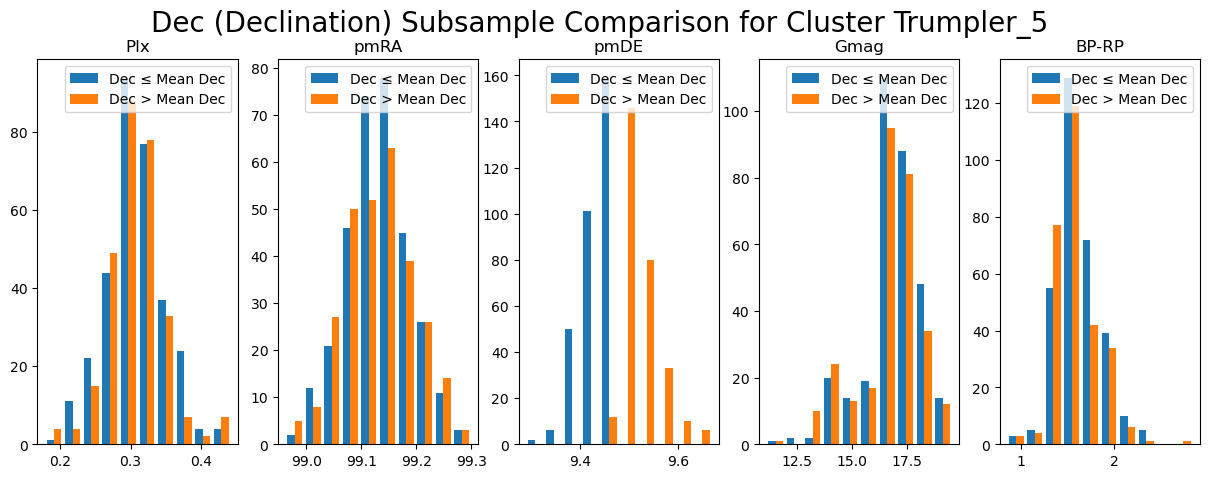

In [108]:
#Now we will do the same procedure for 2 other randomly selected clusters.
#For this we do the following step by step.

############################# For Cluster 1 ####################################

#1-) We randomly sample a cluster, then create 2 subsamples for RA and Dec.
RA_smaller, RA_larger, Dec_smaller, Dec_larger = RA_Dec_Subsamples(clusters_df, stars_hiprob)

#2-) We plot the subsamples for RA and Dec together to compare them.
plot_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

#3-) We do the t-test for 5 parameters and get the t-stats & p-values.
t_stats_ra1, p_values_ra1, t_stats_dec1, p_values_dec1 = t_test_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

**************************************************
t-tests for the RA (Right Ascension) Subsamples: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  1.1472
p-value:  0.2523
--------------------------------------------------
For pmRA :
t-statistic:  -1.8686
p-value:  0.0627
--------------------------------------------------
For pmDE :
t-statistic:  0.614
p-value:  0.5397
--------------------------------------------------
For Gmag :
t-statistic:  0.2343
p-value:  0.8149
--------------------------------------------------
For BP-RP :
t-statistic:  -0.7924
p-value:  0.4288
--------------------------------------------------


**************************************************
t-tests for the Dec (Declination) Subsamples
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
t-statistic:  -0.5458
p-value:  0.5856
--------------------------------------------------
For pmRA :
t-statistic:  -0.9003
p-value:  0.3687
------------------------------------------------

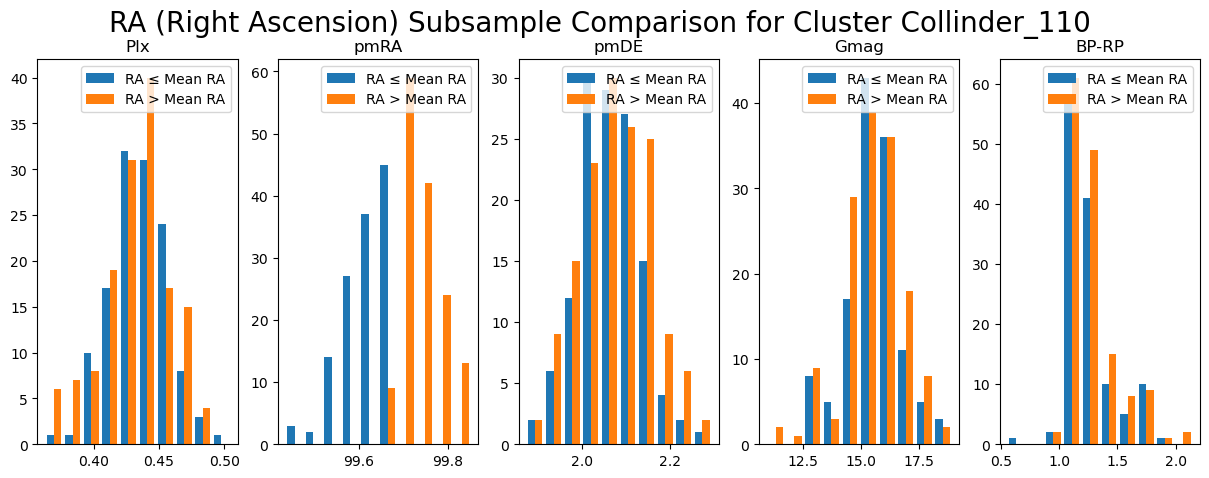

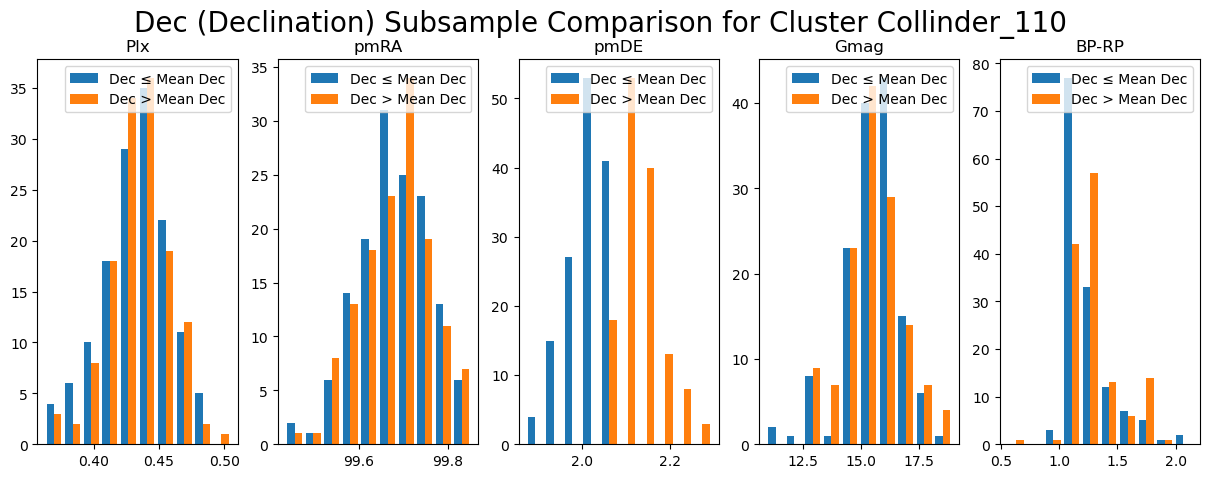

In [109]:
############################# For Cluster 2 ####################################

#1-) We randomly sample a cluster, then create 2 subsamples for RA and Dec.
RA_smaller, RA_larger, Dec_smaller, Dec_larger = RA_Dec_Subsamples(clusters_df, stars_hiprob)

#2-) We plot the subsamples for RA and Dec together to compare them.
plot_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

#3-) We do the t-test for 5 parameters and get the t-stats & p-values.
t_stats_ra1, p_values_ra1, t_stats_dec1, p_values_dec1 = t_test_RA_Dec(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

* **Based on the Parameter Distributions, is the t-test an appropriate test in all cases?**
    * We know that the t-test is used on limited data so basically when our data sample is small (Usually smaller or equal to 30).
    * However, in our clusters we have various numbers of stars from around 200 to much more.
    * Since at large data/sample sizes the t-distribution approaches to the normal distribution, we instead use a z-test.
    * That's why at some of the clusters using a z-test could be more appropriate.
    * But we should also note that we don't know the standard deviation of our data, because of this t-test works in most of the cases.

# Task 3:
* Now you will analyse all the clusters in our new sample.
* This is the sample we have obtained where **star counts > 200** and **constrained in RA & Dec standard deviation**.
* **For all these clusters:**
    * Repeat the 10 t-tests carried out in Task 2a and 2b.

* **For each parameter and coordinate (RA or Dec) being tested:**
    * Plot the resulting p-values in a histogram.
    * So we will have 10 histograms in total.
    * Each will be calculated from $n$ p-values where the $n$ is the number of clusters analysed.

In [110]:
#We redefine the function below to avoid printing the results every time we do
#a loop.
def t_test_RA_Dec_loop(RA_smaller, RA_larger, Dec_smaller, Dec_larger):
    """Takes the DataFrame of subsamples of stars that are separated by the
    condition of their mean RA and mean Dec. Does the t-test and returns the
    t-statistic and probability values (p-values).
    
    Input:
    ----------------------------------------------------------------------------
    RA_smaller: Stars that have RA values that are smaller than the mean RA. 
    RA_larger: Stars that have RA values that are larger than the mean RA.
    Dec_smaller: Stars that have Dec values that are smaller than the mean Dec.
    Dec_larger: Stars that have Dec values that are larger than the mean Dec.
    
    Output:
    ----------------------------------------------------------------------------
    t_stats_ra: A list containing the t-stats for Right Ascension Subsamples
    p_values_ra: A list containing the p-values for Right Ascencsion Subsamples
    t_stats_dec: A list containing the t-stats for Declination Subsamples
    p_values_dec: A list containing the p-values for Declination Subsamples
    
    Definitions:
    ----------------------------------------------------------------------------
    t-stat (t-statistic): Represents the difference between the means of two
    subsamples normalized by the standard error.
    
    p-value (probability-value): Represents the probability of observing the
    t-stat as the one we have calculated, assuming that there are no significant
    differences between the means of two subsamples.
    
    """
    
    #We first define the Parameters we will compare.
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]
    
    #Now we do the t-test as follows. (sps is short for scipy.stats)
    #Note that we write equal_var = True since it is our assumption.
    
    ###########################################################################
    #For RA values:
    
    #We define lists to keep the values in lists.
    t_stats_ra, p_values_ra = [], []
    
    #We do the t-tests
    for parameter in labels:
        t_stat_ra, p_value_ra = sps.ttest_ind(RA_smaller[parameter], RA_larger[parameter], equal_var = True)
        t_stat_ra, p_value_ra = round(t_stat_ra, 4), round(p_value_ra, 4)
        
        t_stats_ra.append(t_stat_ra)
        p_values_ra.append(p_value_ra)
    
    ###########################################################################
    #For Dec values:
    
    #We define lists to keep the values in lists.
    t_stats_dec, p_values_dec = [], []
    
    #We do the t-tests
    for parameter in labels:
        t_stat_dec, p_value_dec = sps.ttest_ind(Dec_smaller[parameter], Dec_larger[parameter], equal_var = True)
        t_stat_dec, p_value_dec = round(t_stat_dec, 4), round(p_value_dec, 4)
        
        t_stats_dec.append(t_stat_dec)
        p_values_dec.append(p_value_dec)
    
    ###########################################################################
    
    return t_stats_ra, p_values_ra, t_stats_dec, p_values_dec

t_stats_ra, p_values_ra, t_stats_dec, p_values_dec = t_test_RA_Dec_loop(RA_smaller, RA_larger, Dec_smaller, Dec_larger)

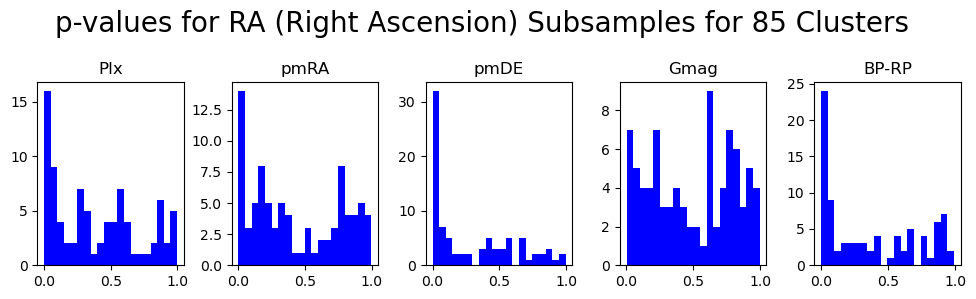

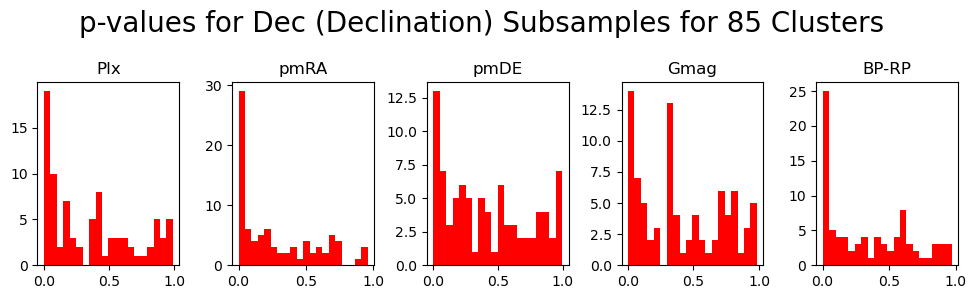

In [185]:
#For this define a whole function.
def cluster_t_tests(clusters_df, stars_hiprob):
    """Takes the DataFrame of clusters and stars with probabilities over 0.8.
    Does the t-test for all of the clusters inside the DataFrame that is given. 
    Returns the histograms of the parameters we analyse and also the histogram 
    and binedges as a list for RA Subsamples and Dec Subsamples.
    
    Input:
    ----------------------------------------------------------------------------
    clusters_df: Cluster DataFrame.
    stars_hiprob: DataFrame that contains Stars that are over 0.8 probability.
    
    Output:
    ----------------------------------------------------------------------------
    p_values_ra_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the RA Subsamples.
    p_values_dec_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the Dec Subsamples.
    5 Histograms comparing RA Subsamples' p-values for the parameters Plx, pmRA, 
    pmDE, Gmag and BP-RP.
    5 Histograms comparing Dec Subsamples' p-values for the parameters Plx, pmRA, 
    pmDE, Gmag and BP-RP.
    
    """
    
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]
    
    #We create lists that will store all t-stats and p-values we obtain.
    #Our goal is to get all of them, then since we have 5 parameters, slice
    #the lists in a way so that we get the p-values for each parameter without
    #defining several lists.
    t_stats_ra_total, p_values_ra_total, t_stats_dec_total, p_values_dec_total = [], [], [], []
    
    #We want to check every cluster we have in our DataFrame.
    #For this we use a "for" loop and the amount of rows (so basically the
    #clusters) we have as follows.
    for i in range((clusters_df.shape[0])):
        #We get the stars in our current cluster.
        stars = cl_stars(clusters_df.iloc[i,0], clusters_df, stars_hiprob)
    
        #Now that we have the stars, we can take the averages of both RA and Dec.
        avg_RA = stars["RAdeg"].mean()
        avg_Dec = stars["DEdeg"].mean()
    
        #Finally, we can create our subsets for RA and Dec as follows.
        split_condition_RA = (stars["RAdeg"] <= avg_RA)
        split_condition_Dec = (stars["DEdeg"] <= avg_Dec)
    
        #Now we create the subsamples by using our split conditions.
        RA_smaller = stars[split_condition_RA]
        RA_larger = stars[~split_condition_RA] 
    
        Dec_smaller = stars[split_condition_Dec]
        Dec_larger = stars[~split_condition_Dec]
        
        #Now we do t-test to our current cluster.
        t_stats_ra, p_values_ra, t_stats_dec, p_values_dec = t_test_RA_Dec_loop(RA_smaller, RA_larger, Dec_smaller, Dec_larger)
        
        #We append the lists to our total lists.
        t_stats_ra_total.append(t_stats_ra)
        p_values_ra_total.append(p_values_ra)
        t_stats_dec_total.append(t_stats_dec)
        p_values_dec_total.append(p_values_dec)
    
    #Now that we have all the values from the clusters, we can plot them.
    #We will plot the p_values for both RA and Declination.
    
    #We first create our figures.
    figure1, axes1 = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 3))
    figure2, axes2 = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 3))
    
    #We also label our figures as follows.
    figure1.suptitle(f"p-values for RA (Right Ascension) Subsamples for {clusters_df.shape[0]} Clusters", size = 20)
    figure2.suptitle(f"p-values for Dec (Declination) Subsamples for {clusters_df.shape[0]} Clusters", size = 20)
    
    #We also create lists to store our values from histograms as follows.
    histograms_ra, histograms_dec = [], []
    binedges_ra, binedges_dec = [], []
    
    #Now we create our histograms as follows.
    
    #For RA we do the following.
    for i in range(len(labels)):
        axes1[i].hist([sublist[i] for sublist in p_values_ra_total], bins = 20, color = "blue")
        axes1[i].set_title(labels[i])
    
    #For Dec we do the following.
    for i in range(len(labels)):
        axes2[i].hist([sublist[i] for sublist in p_values_dec_total], bins = 20, color = "red")
        axes2[i].set_title(labels[i])
    
    figure1.tight_layout()
    figure2.tight_layout()
    
    return p_values_ra_total, p_values_dec_total
    
p_values_ra_total, p_values_dec_total = cluster_t_tests(clusters_df, stars_hiprob)

# Task 4:
* In a large sample of objects and different statistical tests, we always expect some outliers that appear significant in a single test. (**even if the null hypothesis is true!**)
* **But if the null hypothesis for a given statistical test is actually true:** 
    * **The p-values from the test should be drawn from a uniform distribution between 0 and 1!**

* The **K-S (Kolmogorov-Smirnov) test** can be used to compare two distributions to see if their **CDFs (Cumulative Distribution Functions)** are consistent.
* Look up this test and its scipy implementation.
* Then apply it to each of the 10 histograms obtained in Task 3 and comment on your results.

* Now consider what happens if you repeat the K-S Tests but only include **p-values > 0.01** in the test.
    * Does this make a difference to which parameters show a systematic dependence on position in the cluster?
    * What does this tell you about whether an effect is due to a few outliers or is present in the whole population?

In [215]:
#For the K-S test we need to import the following
from scipy.stats import kstest

#We now define a function for the KS Test.
def KS_test(p_values_ra_total, p_values_dec_total):
    """Takes p-values we have obtained from all the clusters' RA and Dec
    subsamples as a list. Does the KS test and returns the KS p-values.
    
    Input:
    ----------------------------------------------------------------------------
    p_values_ra_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the RA Subsamples.
    p_values_dec_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the Dec Subsamples.
    
    Output:
    ----------------------------------------------------------------------------
    ks_p_values_ra: A list that contains Plx, pmRA, pmDE, Gmag, BP-RP 
    parameters' p-values, obtained from the RA Subsamples by using KS Test.
    ks_p_values_dec: A list that contains Plx, pmRA, pmDE, Gmag, BP-RP 
    parameters' p-values, obtained from the Dec Subsamples by using KS Test.
    
    """
    
    #Again we define the parameter set we have.
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]
    
    #We also define a list to store the KS p-values for both RA and Dec 
    #subsamples.
    ks_p_values_ra, ks_p_values_dec = [], []
    
    #Now we perform the KS test.
    #Note that we use the UNIFORM distribution here since the task states that
    #"p-values from the test should be drawn from a uniform distribution between 
    #0 and 1!".
    
    #We will also print our results for convenience.
    
    #For RA & Declination:
    print(50 * "*")
    print("KS-test p-values for the RA (Right Ascension) Subsamples: ")
    print(50 * "~")
    
    for i in range(len(labels)):
        ks_stat_ra, ks_p_value_ra = sps.kstest([sublist[i] for sublist in p_values_ra_total], "uniform")
        ks_stat_ra, ks_p_value_ra = round(ks_stat_ra, 4), round(ks_p_value_ra, 4)
        
        print("For", labels[i].strip(""), ":")
        print("ks-statistic: ", ks_stat_ra)
        print("ks p-value: ", ks_p_value_ra)
        print(50*"-")
    
        ks_p_values_ra.append(ks_p_value_ra)
    
    print("\n")
    print(50 * "*")
    print("KS-test p-values for the Dec (Declination) Subsamples: ")
    print(50 * "~")
    
    for i in range(len(labels)):
        ks_stat_dec, ks_p_value_dec = sps.kstest([sublist[i] for sublist in p_values_dec_total], "uniform")
        ks_stat_dec, ks_p_value_dec = round(ks_stat_dec, 4), round(ks_p_value_dec, 4)
        
        print("For", labels[i].strip(""), ":")
        print("ks-statistic: ", ks_stat_dec)
        print("ks p-value: ", ks_p_value_dec)
        print(50*"-")
    
        ks_p_values_dec.append(ks_p_value_dec)
    
    return ks_p_values_ra, ks_p_values_dec

ks_p_values_ra, ks_p_values_dec = KS_test(p_values_ra_total, p_values_dec_total)

**************************************************
KS-test p-values for the RA (Right Ascension) Subsamples: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
ks-statistic:  0.2146
ks p-value:  0.0006
--------------------------------------------------
For pmRA :
ks-statistic:  0.1749
ks p-value:  0.0096
--------------------------------------------------
For pmDE :
ks-statistic:  0.3782
ks p-value:  0.0
--------------------------------------------------
For Gmag :
ks-statistic:  0.0853
ks p-value:  0.5373
--------------------------------------------------
For BP-RP :
ks-statistic:  0.2907
ks p-value:  0.0
--------------------------------------------------


**************************************************
KS-test p-values for the Dec (Declination) Subsamples: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
ks-statistic:  0.2633
ks p-value:  0.0
--------------------------------------------------
For pmRA :
ks-statistic:  0.3661
ks p-value:  0.0
---------------

### Comments:
* By doing this test we are testing if our Parameters are Uniformly Distributed or not.
* So our Null Hypothesis is **"the parameters are drawn from a Uniform Distribution"**.
* Again, assuming the Significance Level being **0.05**, we can see that except for `Gmag` on the RA Subsamples, none of the parameters are over this significance level.
* So the Null Hypothesis is mostly rejected.
* Which tells us that the parameters are (except for `Gmag` on RA Subsamples) **non uniform** so they are not uniformly distributed.

In [224]:
#Now we will do the same thing for only p-values that are over 0.01.

#We now define a function for the KS Test.
def KS_test_2(p_values_ra_total, p_values_dec_total):
    """Takes p-values we have obtained from all the clusters' RA and Dec
    subsamples as a list. Does the KS test for p-values that are over 0.01 
    and returns the KS p-values.
    
    Input:
    ----------------------------------------------------------------------------
    p_values_ra_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the RA Subsamples.
    p_values_dec_total: A list that contains sublists with Plx, pmRA, pmDE, Gmag,
    BP-RP parameters' p-values, obtained from the Dec Subsamples.
    
    Output:
    ----------------------------------------------------------------------------
    ks_p_values_ra_2: A list that contains Plx, pmRA, pmDE, Gmag, BP-RP 
    parameters' p-values, obtained from the RA Subsamples by using KS Test.
    ks_p_values_dec_2: A list that contains Plx, pmRA, pmDE, Gmag, BP-RP 
    parameters' p-values, obtained from the Dec Subsamples by using KS Test.
    
    """
    
    #Again we define the parameter set we have.
    labels = ["Plx", "pmRA", "pmDE", "Gmag", "BP-RP"]
    
    #We also define a list to store the KS p-values for both RA and Dec 
    #subsamples.
    ks_p_values_ra_2, ks_p_values_dec_2 = [], []
    
    #Now we perform the KS test.
    #Note that we use the UNIFORM distribution here since the task states that
    #"p-values from the test should be drawn from a uniform distribution between 
    #0 and 1!".
    
    #We will also print our results for convenience.
    
    #For RA & Declination:
    print(50 * "*")
    print("KS-test p-values for the RA (Right Ascension) Subsamples", "\n", "(p-value > 0.01): ")
    print(50 * "~")
    
    for i in range(len(labels)):
        ks_stat_ra, ks_p_value_ra = sps.kstest([sublist[i] for sublist in p_values_ra_total if sublist[i] >= 0.01], "uniform")
        ks_stat_ra, ks_p_value_ra = round(ks_stat_ra, 4), round(ks_p_value_ra, 4)
        
        print("For", labels[i].strip(""), ":")
        print("ks-statistic: ", ks_stat_ra)
        print("ks p-value: ", ks_p_value_ra)
        print(50*"-")
    
        ks_p_values_ra_2.append(ks_p_value_ra)
    
    print("\n")
    print(50 * "*")
    print("KS-test p-values for the Dec (Declination) Subsamples", "\n", "(p-value > 0.01): ")
    print(50 * "~")
    
    for i in range(len(labels)):
        ks_stat_dec, ks_p_value_dec = sps.kstest([sublist[i] for sublist in p_values_dec_total if sublist[i] >= 0.01], "uniform")
        ks_stat_dec, ks_p_value_dec = round(ks_stat_dec, 4), round(ks_p_value_dec, 4)
        
        print("For", labels[i].strip(""), ":")
        print("ks-statistic: ", ks_stat_dec)
        print("ks p-value: ", ks_p_value_dec)
        print(50*"-")
    
        ks_p_values_dec_2.append(ks_p_value_dec)
    
    return ks_p_values_ra_2, ks_p_values_dec_2

ks_p_values_ra_2, ks_p_values_dec_2 = KS_test_2(p_values_ra_total, p_values_dec_total)

**************************************************
KS-test p-values for the RA (Right Ascension) Subsamples 
 (p-value > 0.01): 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
ks-statistic:  0.1449
ks p-value:  0.071
--------------------------------------------------
For pmRA :
ks-statistic:  0.1224
ks p-value:  0.1834
--------------------------------------------------
For pmDE :
ks-statistic:  0.2361
ks p-value:  0.0011
--------------------------------------------------
For Gmag :
ks-statistic:  0.0864
ks p-value:  0.5291
--------------------------------------------------
For BP-RP :
ks-statistic:  0.1596
ks p-value:  0.0502
--------------------------------------------------


**************************************************
KS-test p-values for the Dec (Declination) Subsamples 
 (p-value > 0.01): 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Plx :
ks-statistic:  0.2046
ks p-value:  0.0026
--------------------------------------------------
For pmRA :
ks-stati

* By excluding **p-values =< 0.01** we focus on the data that could be uniformly distributed. (The probability of the Parameter distribution being uniform is higher)
* When doing the KS Test, if the p-values are small:
    * We will get a significant deviation from the uniform distribution.
    * To avoid this, we could constrain the p-values to >0.01!
    * That way we check the situations where our Parameters are close to Uniform Distribution.

* The reason why we do this:
    * To find out if there is a systematic dependence on for position or if it is due to outliers.

* **We see that if we consider all p-values:**
    * The parameters we have are far from the uniform distribution.
    * So the p-values are **statistically significant**.
    * For this reason, we consider a systematic dependence on the position in the cluster for the parameters that are non-uniformly distributed.

* **We see that on p-values > 0.1:**
    * The parameters we have are closer to the uniform distribution.
    * So the p-values are **not statistically significant**.
    * Due to this we can interpret **the systematic dependence as the outliers.**
    * So the systematic dependence we found from the t-test might be due to the outliers (or extreme cases).

* **What does this tell you about whether an effect is due to a few outliers or is present in the whole population?**
    * It is just a few outliers since we don't see the same behaviour in all of the parameters.
    * So for some of the parameters **outliers do exist as the systematic dependence**.
    * We can not say that it is present in the whole population.